# Description of Problem

You have a function called random, which generates a random number between 0 to 1, uniformly. 
How would one be able to calculate $\pi$ using this function?

# Approach to the Solution

You are given the function which uniformly draws a number between the bounds of 0 and 1. We can frame this problem by drawing a unit square, which has lengths equal to 1. The procedure here is to imagine that you can draw/sample from the uniform distribution, generating a pair of (x,y) coordinates respectively. Ultimately, this point which is defined by these two variables will be confined by the area of the unit square. We can then compute the distance from the origin as to where this point lies, simply by applying Pythagorean Theorem:

$$ r^2 = x^2 + y^2 $$

Then, having this calculated distance, we can see from Figure 1 that any point that has a distance less than or equal to 1 would either lie on the boundry of the circle or within it. Thus, we can then take the ratio of the number of points which fall within this blue-shaded area with respect to the total number of points (which would encompass those that fall within and outside the 1/4 circular boundry) as a proxy and similar ratio to the area of the circle ($A_{circle}=\pi r^2$) relative to the area of the square ($A_{square} = r^2$). Hence this hypothesis leads to the estimation of $\pi$ but scaled by a factor of 4 as only one 1/4 of the circle is used. 

The expectation here is that as you increase the number of points that you use to sample, you will get a better approximation of $\pi$.

$$ \bar\pi \approx \frac{A_{circle}}{A_{square}} \approx \frac{n^{points}_{circle}}{n^{points}_{total}} $$

[<img src="Figures/UnitSquare_Circle_Estimate_Pi.png" width="500"/>](Figures/UnitSquare_Circle_Estimate_Pi.png)
#### 

In [18]:
import pandas as pd
import numpy as np
from numpy import random
import seaborn as sns
import os, time, math
import matplotlib.pyplot as plt

def estimate_pi(n_points):
    """
    Inputs
    -------
    n: number of points you would use to estimate
    
    Returns
    -------
    Estimate of pi
    """
    # Initially you want to set the two variables x, y by sampling from a uniform distribution
    # Then check the distance and determine whether the point is in the 1/4 circle or not
    
    num_points_circle = 0
    
    for i in range(n_points):
        x = random.uniform(0,1)
        y = random.uniform(0,1)
        # Pythagorean Theorem to calculate the distance, and check if it is <= 1, if True then the point is within the circle 
        d_est = x**2+y**2
        if d_est <= 1:
            num_points_circle += 1
        
    return 4*(num_points_circle/n_points)

def estimate_pi2(n_points):
    """
    Inputs
    -------
    n: number of points you would use to estimate
    
    Returns
    -------
    Estimate of pi
    """
    x = random.random(n_points)
    y = random.random(n_points)
    d_est = x**2 + y**2
    num_points_circle = sum(d_est<=1)
    
    return 4*(num_points_circle/n_points)

def run_test(range_to_check=8):
    num_points_list = [10**i for i in range(1, range_to_check)]
    pi_list, run_time = [], []
    for num_iters in num_points_list:
        t1 = time.time()
        pi_est1 = estimate_pi(num_iters)
        t2 = time.time()
        pi_est2 = estimate_pi2(num_iters)
        t3 = time.time()

        t_alg1 = t2-t1
        t_alg2 = t3-t2
        pi_list.append([pi_est1, pi_est2])
        run_time.append([t_alg1, t_alg2])
    return pi_list, run_time

def create_dataframe(pi_list, run_time):
    df_pi_est = pd.DataFrame(pi_list, columns = ['pi_est_1', 'pi_est_2'])
    df_run_times = pd.DataFrame(run_time, columns = ['t_alg_1', 't_alg_2'])
    results = df_pi_est.merge(df_run_times, left_index = True, right_index = True)
    results.index = [10**i for i in range(1, len(pi_list)+1)]
    return results

## Call the Two Functions
* Outputs of run_test() will be used as inputs to create_dataframe()

In [19]:
pi_list, run_time = run_test()
results = create_dataframe(pi_list, run_time)
results


,pi_est_1,pi_est_2,t_alg_1,t_alg_2
10,2.800000,2.000000,0.000050,0.000057
100,3.080000,3.120000,0.000226,0.000132
1000,3.080000,3.068000,0.002304,0.001462
10000,3.154400,3.171600,0.020884,0.010030
100000,3.142120,3.137400,0.187342,0.098805
1000000,3.141860,3.140788,1.881984,0.986415
10000000,3.141674,3.141208,18.699013,9.816765


## Plotting the Results - Comparing Two Methods 

* The following plots show the estimations between the two different functions, estimate_pi and estimate_pi2 for a range of points used in the estimation. 
* The resulting plots show that they slowly converge to the true value, however the main observable difference is the run-time of the first algorithm which takes roughly twice as much time (this is a result of the for loop which would scale with the number of points used).

/var/folders/2v/fdclpbzj4xd980kdcq59l9100000gn/T/ipykernel_29858/1022552582.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(labels = plot_labels)


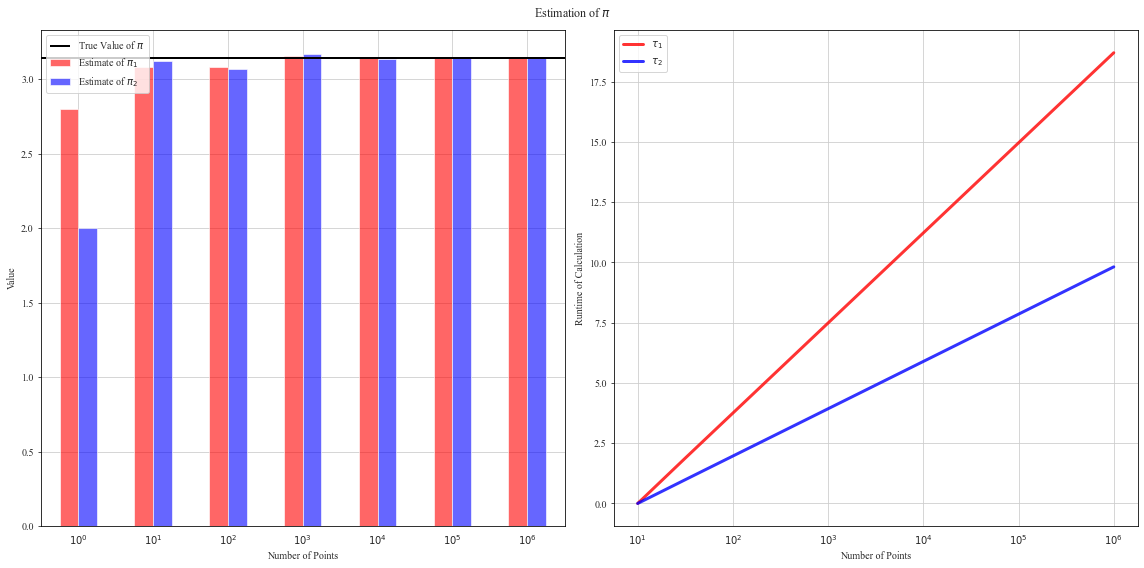

In [22]:
plot_labels = [f'$10^{i}$'for i in range(len(pi_list))]
with sns.axes_style('whitegrid', {'ytick.left': True, 'axes.edgecolor':'black',
                                                            'font.serif': ['Times New Roman'],
                           'font.family': 'Times New Roman'}):

    fig, axes = plt.subplots(figsize = (16,8), ncols = 2)
    
    results.iloc[:, 0:2].plot(kind='bar', color = ['r', 'b'], alpha = 0.6, ax = axes[0], grid = True)
    axes[0].hlines(y = math.pi, xmin = -1, xmax = results.index[-1], lw = 2, ls = '-', color = 'k')
    axes[0].set_xticklabels(labels = results.index, rotation = 0)
    axes[0].legend(labels = ['True Value of $\pi$', 'Estimate of $\pi_1$', 'Estimate of $\pi_2$'])
    axes[0].set_xticklabels(labels = plot_labels)
    axes[0].set_xlabel('Number of Points')
    axes[0].set_ylabel('Value')

    results.iloc[:, 2:].plot(kind='line', color = ['r', 'b'], alpha = 0.8, ax = axes[1], grid = True, lw = 3)
    axes[1].legend(labels = ['$\\tau_1$', '$\\tau_2$'])
    axes[1].set_xticklabels(labels = plot_labels)
    axes[1].set_xlabel('Number of Points')
    axes[1].set_ylabel('Runtime of Calculation')
    plt.suptitle('Estimation of $\pi$')
    plt.tight_layout()
    plt.show()